In [39]:
import spacy
import pandas as pd
import seaborn as sn

In [40]:
df = pd.read_csv("reviews_df.csv")
df.head()

,0,1
0,True,"Savršeno! U samom centru grada. Dobre cijene, ..."
1,True,Godišnja klubska skupština BK Sljeme. Pozdrav ...
2,True,Hrana je izuzetno fina i ima okus kao da je sv...
3,True,"Odlična kava 😃☕, mirno mjesto, kao i vrlo ljub..."
4,True,Hvala ekipi iz Cvjetnog objekta Žirafa večeras...


# True - rating is positive, False - rating is negativ

In [41]:
df = df.rename(columns={'0': 'rating', '1':'comment'})

c:\Users\Ivana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

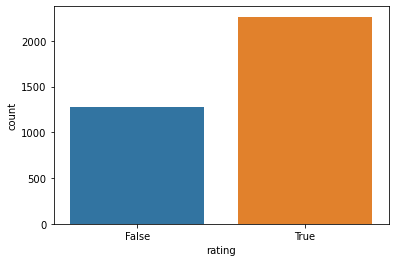

In [42]:
sn.countplot(df.rating)

In [43]:
nlp = spacy.load("hr_core_news_sm")

In [44]:
def text_analysing(input):
    doc = nlp(input)

    for token in doc:
        print(token, '------ >', token.is_alpha, token.is_stop)


In [45]:
text_analysing(df.comment[3])


Odlična ------ > True False
kava ------ > True False
😃 ------ > False False
☕ ------ > False False
, ------ > False False
mirno ------ > True False
mjesto ------ > True False
, ------ > False False
kao ------ > True True
i ------ > True True
vrlo ------ > True True
ljubazan ------ > True False
i ------ > True True
uporan ------ > True False
konobar ------ > True False
Danijel ------ > True False
koji ------ > True True
ima ------ > True False
iznimno ------ > True False
razvijene ------ > True False
komunikacijske ------ > True False
vještine ------ > True False
i ------ > True True
izrazito ------ > True False
lijepo ------ > True False
obavlja ------ > True False
svoj ------ > True True
posao ------ > True False
konobara ------ > True False
. ------ > False False
☺ ------ > False False
️ ------ > False False
Kad ------ > True False
smo ------ > True True
ga ------ > True True
mama ------ > True False
i ------ > True True
ja ------ > True True
pitale ------ > True False
kakva ------ >

In [46]:
def text_cleaner(input):
    doc = nlp(input)

    filtered_tokens = []
    for token in doc:
        if not token.is_alpha or token.is_stop:
            continue
        filtered_tokens.append(token.lemma_.lower())
    return " ".join(filtered_tokens)

In [47]:
text_cleaner(df.comment[3])

'odličan kava miran mjesto ljubazan uporan konobar danijel imati iznimno razvijen komunikacijski vještina izrazito lijepo obavljati posao konobar kad ma pitati kakav hrana imati strpljenje opisati preporučiti tortilja piletina umak šampinjon požaliti doslovno troje najediti dva koliko dobijetiti topla preporuka'

In [48]:
df['comment_clean'] = df.comment.apply(text_cleaner)

In [49]:
import numpy as np

def text_vec(input):
    doc = nlp(input)

    my_vec = [token.vector for token in doc]
    mean_vector = np.mean(my_vec, axis=0)
    
    return mean_vector
    # return my_vec

In [50]:
text_vec(df.comment_clean[3])

array([ 2.19663   ,  1.1101186 ,  2.6017728 , -0.25637496, -0.4248271 ,
        0.36532015,  2.1543355 ,  0.52529854,  2.06821   ,  0.3227079 ,
        2.6953552 ,  0.07592988, -0.08362625,  0.5340551 , -3.9761014 ,
        0.10802066, -1.2636412 , -1.8553892 , -0.86093503,  2.3022716 ,
        2.376149  , -1.1716157 ,  1.4409847 , -0.90869206, -1.4655987 ,
       -0.09427007,  1.4970952 , -0.02689219,  0.8813016 ,  1.2014072 ,
        0.9230506 , -1.850323  ,  2.8321085 ,  0.7554494 ,  2.7185285 ,
        0.9921257 , -0.2822242 , -3.2651093 ,  0.34620804, -1.1625577 ,
       -0.9385947 ,  3.2485747 , -1.0503718 ,  2.5410986 ,  0.956607  ,
        0.39047512, -3.9597187 , -2.950185  , -2.3104138 ,  2.0887408 ,
       -3.5396962 ,  0.9893199 , -1.1794772 , -1.5299419 ,  0.35440502,
       -0.09474212, -2.588976  ,  0.8202192 , -2.5663571 , -1.5569303 ,
        0.01364546,  0.22421531,  0.6108369 , -1.1944582 ,  1.4642146 ,
       -1.0265992 ,  1.6370256 , -1.9411303 , -0.96805364,  0.36

In [51]:
df['comment_vec'] = df.comment_clean.apply(text_vec)

In [52]:
df['rating_indx']= df['rating'].map({True : 1, False : 0})

In [53]:
df.head()

,rating,comment,comment_clean,comment_vec,rating_indx
0,True,"Savršeno! U samom centru grada. Dobre cijene, ...",savršeno sam centar grad dobar cijena velik po...,"[-0.8565574, 0.024276903, 1.814268, -0.3740515...",1
1,True,Godišnja klubska skupština BK Sljeme. Pozdrav ...,godišnji klubski skupština bk sljeme pozdrav m...,"[1.0996566, -0.5500721, 1.7814565, -0.56496924...",1
2,True,Hrana je izuzetno fina i ima okus kao da je sv...,hrana izuzetno fina imati okus svježe ljubazan...,"[2.6290076, 2.5566158, 2.0350564, -0.21539225,...",1
3,True,"Odlična kava 😃☕, mirno mjesto, kao i vrlo ljub...",odličan kava miran mjesto ljubazan uporan kono...,"[2.19663, 1.1101186, 2.6017728, -0.25637496, -...",1
4,True,Hvala ekipi iz Cvjetnog objekta Žirafa večeras...,hvala ekipi cvjetnog objekt žirafa večeras pre,"[-1.3380631, 0.5419602, -0.22619285, -0.177232...",1


In [54]:
df.rating_indx.value_counts()

1    2265
0    1279
Name: rating_indx, dtype: int64

In [55]:
df.comment_vec.isnull().value_counts()

False    3544
Name: comment_vec, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

## Naive Byes & TfIdf

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    df.comment_clean,
    df.rating_indx,
    test_size=0.2,
    random_state=2022,
    )

In [75]:
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('gradient', MultinomialNB())
]
)

clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('gradient', MultinomialNB())])

              precision    recall  f1-score   support

           0       0.95      0.44      0.61       254
           1       0.76      0.99      0.86       455

    accuracy                           0.79       709
   macro avg       0.86      0.72      0.73       709
weighted avg       0.83      0.79      0.77       709

[[113 141]
 [  6 449]]


<AxesSubplot:>

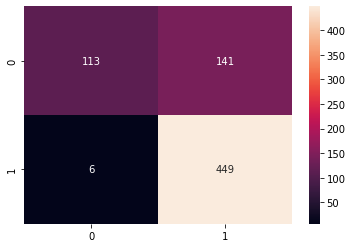

In [76]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
sn.heatmap(cm, annot=True, fmt='d')

## Naive Bayes & Trigram

In [106]:
clf1 = Pipeline([
    ('bow', CountVectorizer(ngram_range=(1,3))),
    ('gradient', MultinomialNB())
]
)

clf1.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(ngram_range=(1, 3))),
                ('gradient', MultinomialNB())])

              precision    recall  f1-score   support

           0       0.88      0.60      0.72       254
           1       0.81      0.96      0.88       455

    accuracy                           0.83       709
   macro avg       0.85      0.78      0.80       709
weighted avg       0.84      0.83      0.82       709

[[153 101]
 [ 20 435]]


<AxesSubplot:>

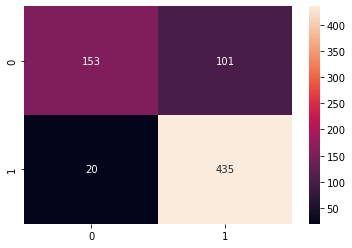

In [107]:
y_pred = clf1.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
sn.heatmap(cm, annot=True, fmt='d')

### Testing the model

- s obzirom na to da ovaj model ima najbolji f1-score, on ce se koristiti za klasifikaciju, tj testiranje klasifikacije novih reviewa, koje model nije vidio, odnosno na kojima nije treniran

In [109]:
text = "Ovaj novi kafic na cvjetnom je sjajan, konobar je ljubazan, no nije nametljiv. kava je zakon."

input = text_cleaner(text)

clf1.predict([input])

array([1], dtype=int64)

In [153]:
def review_classification(input_review):

    user_input = text_cleaner(input_review)
    classifier = clf1.predict([user_input])

    if classifier == 1:
        outcome = f"Ovo je DOBRA kritika:  {input_review}"
    elif classifier == 0:
        outcome = f"Ovo je LOŠA kritika:  {input_review}"
    else:
        outcome = f"ne razumijem kritiku."

    return outcome

In [154]:
review_classification("Ovaj novi kafic na cvjetnom je sjajan, konobar je ljubazan, no nije nametljiv. kava je zakon.")

'Ovo je DOBRA kritika:  Ovaj novi kafic na cvjetnom je sjajan, konobar je ljubazan, no nije nametljiv. kava je zakon.'

## Vectorized text & statistical ML 

In [166]:
import numpy as np

X = np.stack(df.comment_vec)  
print("Shape of X_train after reshaping: ", X.shape)
y= df.rating_indx


Shape of X_train after reshaping:  (3544, 96)


In [164]:
model = GradientBoostingClassifier()
model.fit(X,y)

GradientBoostingClassifier()

In [165]:
model.score(X,y)

0.8431151241534989

In [159]:
text = "Ovaj kafic je super."

input = text_vec(text)

model.predict([input])

array([1], dtype=int64)